In [40]:
import pandas as pd
import pickle, matplotlib.pyplot as plt

filetl = 'datasets.csv'

df = pd.read_csv(filetl)

# replace all - with commas, in all cells
df = df.replace('-',',', regex=True)
df = df.replace('_','\\_', regex=True)
df = df.replace('&','and', regex=True)

df = df.replace('IDMT,SMT,Guitar Dataset','IDMT\\_SMT\\_Guitar Dataset', regex=True)



df = df.replace('TRUE',r'\\cmark', regex=True)
print(df.columns)
#drop hexaphonic column from dataframe
df = df.drop(columns=[' Hexaphonic','Other Annotations'])
# Replace NaN with string '\xmark'
df = df.fillna('\\xmark')

display(df)
lat = df.to_latex(index=False)
print(lat)



Index(['Dataset', ' Guitar Type', 'Transducer', ' Hexaphonic',
       'Annotated Techniques', 'Onset annotations', 'Other Annotations'],
      dtype='object')


,Dataset,Guitar Type,Transducer,Annotated Techniques,Onset annotations
0,Guitar Set,Acoustic,Internal,\xmark,\cmark
1,IDMT\_SMT\_Guitar Dataset,"Acoustic,Electric",Internal and External,3 excitation styles and 6 expression styles,\cmark
2,EGDB,Electric,Internal,\xmark,\cmark (MIDI)
3,aGPTset,Acoustic,Internal,12,\cmark (for 8 techniques)


\begin{tabular}{lllll}
\toprule
Dataset &  Guitar Type & Transducer & Annotated Techniques & Onset annotations \\
\midrule
Guitar Set &  Acoustic & Internal & \xmark & \cmark \\
IDMT\_SMT\_Guitar Dataset & Acoustic,Electric & Internal and External & 3 excitation styles and 6 expression styles & \cmark \\
EGDB & Electric & Internal & \xmark & \cmark (MIDI) \\
aGPTset &  Acoustic &  Internal &  12 &  \cmark (for 8 techniques) \\
\bottomrule
\end{tabular}



In [70]:
# filet2 = 'datasets-sample-measurements/results.csv'
pfname = 'datasets-sample-measurements/result-errors.pickle'

with open(pfname, 'rb') as f:
    errors = pickle.load(f)

renamer = {
    'idmt-smt-guitar-v2': 'IDMT_SMT_Guitar',
    'guitarset': 'GuitarSet',
    'egdbset': 'EGDB'
}

# df2 = pd.read_csv(filet2, sep='\t')

templist = []
for k,v in errors.items():
    DOINT= False
    if DOINT:
        templist.append( (k,int(round(v['mean'],0)),int(round(v['std'],0))) )
    else:
        templist.append( (k,round(v['mean'],1),round(v['std'],1)) )
df2 = pd.DataFrame(templist, columns=['Dataset','Mean Onset Error [ms]', 'Std Dev. [ms]'])



# # replace idmt-smt-guitar-v2	with IDMT\_SMT\_Guitar Dataset
# df2 = df2.replace('idmt-smt-guitar-v2','IDMT\\_SMT\\_Guitar', regex=True)
# # guitarset with GuitarSet
# df2 = df2.replace('guitarset','GuitarSet', regex=True)
# # egdbset with EGDB
# df2 = df2.replace('egdbset','EGDB', regex=True)
# apply renamer to dataset names
df2['Dataset'] = df2['Dataset'].apply(lambda x: renamer[x].replace('_','\\_'))

# all column names bold (latex)
df2.columns = [f'\\textbf{{{col}}}' for col in df2.columns]


display(df2)
lat = df2.to_latex(index=False, float_format="%.1f")
print(lat)

,\textbf{Dataset},\textbf{Mean Onset Error [ms]},\textbf{Std Dev. [ms]}
0,EGDB,34.6,31.4
1,GuitarSet,12.4,3.8
2,IDMT\_SMT\_Guitar,8.5,9.2


\begin{tabular}{lrr}
\toprule
\textbf{Dataset} & \textbf{Mean Onset Error [ms]} & \textbf{Std Dev. [ms]} \\
\midrule
EGDB & 34.6 & 31.4 \\
GuitarSet & 12.4 & 3.8 \\
IDMT\_SMT\_Guitar & 8.5 & 9.2 \\
\bottomrule
\end{tabular}



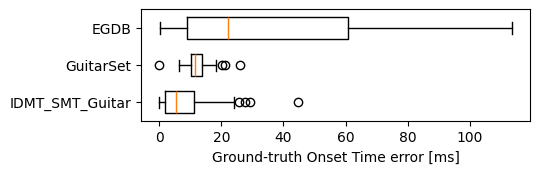

In [47]:
# small horizontal boxplot

fac = 1.1
fig, ax = plt.subplots(figsize=(5*fac, 1.5*fac))


for i,k in enumerate(errors.keys()):
    err = list(errors[k]['errors'])
    ax.boxplot(err, positions=[i], widths=0.6, vert=False)
ax.set_yticks(range(len(errors.keys())))
ax.set_yticklabels([renamer[e] for e in errors.keys()])
# reverse vertical order
ax.invert_yaxis()
plt.tight_layout()
ax.set_xlabel('Ground-truth Onset Time error [ms]') 
fig.savefig('../paper_figures/dataset-onset-error.svg', bbox_inches='tight')